## Regresiones Robustas:
- Las regresiones robustas son un enfoque de modelado que busca minimizar el impacto de los valores atípicos o ruidosos en el ajuste de un modelo de regresión. En contraste con las regresiones ordinarias, las regresiones robustas dan menos peso a los valores atípicos, lo que las hace más resistentes a la influencia de observaciones extremas.

## Implementación en Scikit-learn:
- Scikit-learn proporciona la clase HuberRegressor para realizar regresiones robustas utilizando el enfoque Huber. Este enfoque es una combinación de la regresión ordinaria y la regresión absoluta (L1) con un parámetro de influencia. A continuación, te mostraré cómo implementar una regresión robusta utiliz

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error

# Carga del conjunto de datos
data = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/felicidad.csv')

# Codificación one-hot para la columna 'country'
data = pd.get_dummies(data, columns=['country'], drop_first=True)

# Separación de características y etiquetas
X = data.drop(columns=['score'])
y = data['score']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicación de la regresión robusta (HuberRegressor)
huber_model = HuberRegressor()
huber_model.fit(X_train_scaled, y_train)
y_pred_huber = huber_model.predict(X_test_scaled)

# Evaluación del modelo
huber_mse = mean_squared_error(y_test, y_pred_huber)
print(f'MSE Huber: {huber_mse}')


MSE Huber: 0.03537727938749418


/home/jhonfypy/anaconda3/envs/Scikit-learni-envjf/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


En este ejemplo, primero se cargan los datos y se dividen en conjuntos de entrenamiento y prueba. Luego, se estandarizan las características y se aplica la regresión robusta utilizando HuberRegr

## Ventajas de las Regresiones Robustas:

- Las regresiones robustas son menos sensibles a los valores atípicos y ruidosos en los datos.
Pueden proporcionar estimaciones más estables y precisas en presencia de observaciones extremas.
Consideraciones:
Aunque las regresiones robustas pueden ser útiles en muchos casos, es importante tener en cuenta que no son una solución universal para todos los problemas. La elección entre regresiones ordinarias y robustas depende de la naturaleza de los datos y los objetivos del análisis.

> En resumen, las regresiones robustas, como HuberRegressor en Scikit-learn, son herramientas valiosas para modelar datos con valores atípicos. Te permiten obtener estimaciones más confiables y estables en presencia de observaciones extremas en tus datos.

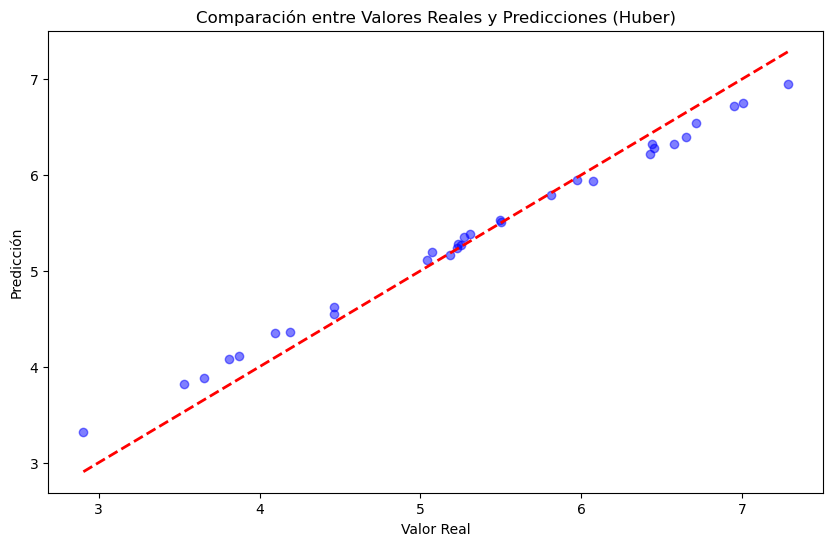

In [3]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_huber, color='blue', alpha=0.5)

# Configurar los ejes y etiquetas
plt.title('Comparación entre Valores Reales y Predicciones (Huber)')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

# Agregar línea de regresión
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Mostrar la gráfica
plt.show()
